# Multiple pendulum plots solutions to problems

Use Pendulum class to generate basic pendulum plots, applied to problems from Taylor.

Now uses a new ODE solver.

* Last revised 29-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [33]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [38]:
class BeadHoop():
    """
    BeadHoop using the notation from Taylor.
     
    Parameters
    ----------
    omega : float
        
    g : float
        
    R : float
        


    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega=np.sqrt(2.), g=1., R=1.):
        self.omega = omega
        self.g = g
        self.R = R
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
            
        Returns
        -------
        
        """
        return [ y[1], ( (self.omega**2) * np.cos(y[0])- g/R )*np.sin(y[0]) ]
    
    
    def solve_ode(self, t_pts, phi_0, phi_dot_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi, phi_dot = solution.y

        return phi, phi_dot

def approxSoln(t, g=1, R=1, omega=np.sqrt(2), eps0=0):
    
    theta_0 = np.arccos(g/((omega**2)*R))
    OmPr = np.sqrt(omega**2 - (g/(omega*R))**2)
    
    return theta_0 + eps0 * np.cos(OmPr*t)
    

In [45]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend(loc=1)
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots for Taylor problem 12.8

In [46]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
omega = np.sqrt(2)
R = 1.
g = 1.
eps = np.array([1, 10, 20])*np.pi / 180.0
epsStr = ['1\:degree', '10\:degrees', '20\:degrees']

# Instantiate a pendulum 
bh1 = BeadHoop(omega=omega, R=R, g=g)

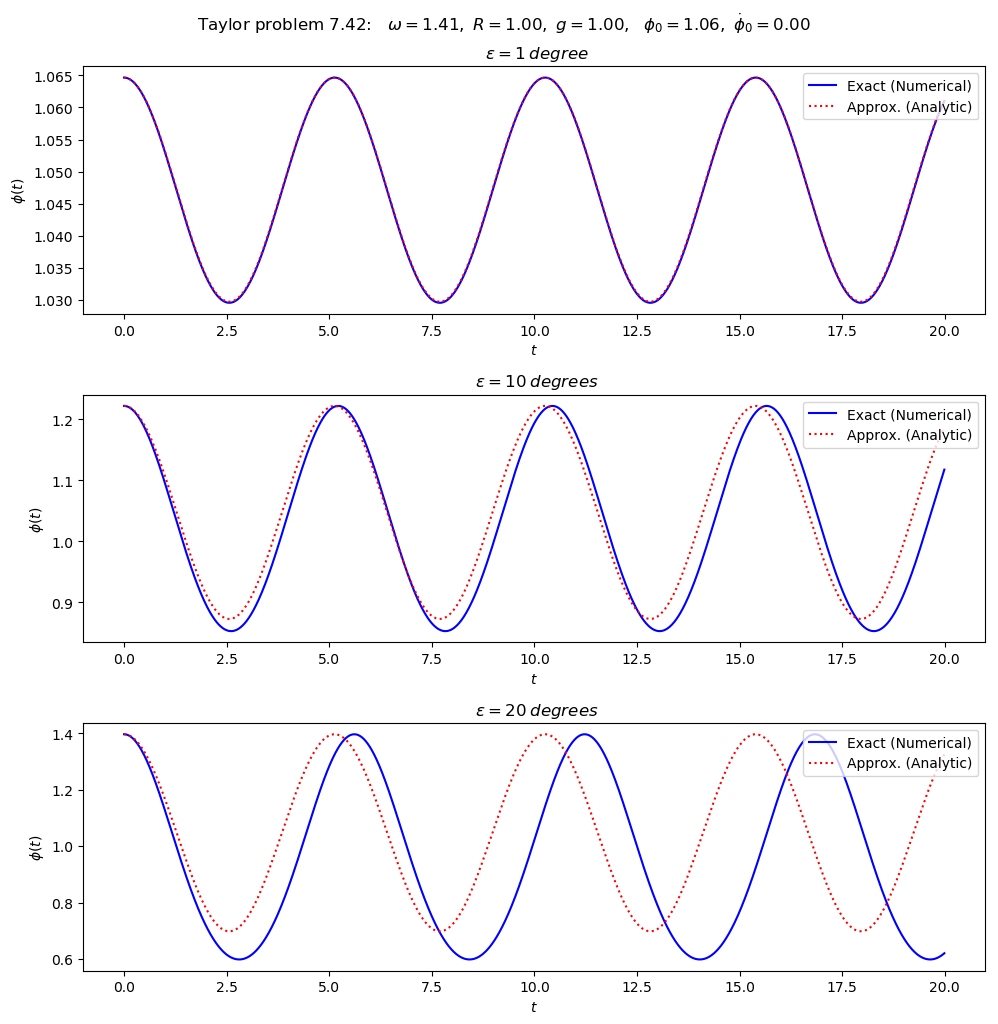

In [54]:
# both plots: same initial conditions
theta_0 = np.arccos(g/((omega**2)*R))
phi_0_0 = theta_0 + eps[0]
phi_0_1 = theta_0 + eps[1]
phi_0_2 = theta_0 + eps[2]
phi_dot_0 = 0.0

# Solve Exact Solutions
phi0, phi_dot0 = bh1.solve_ode(t_pts, phi_0_0, phi_dot_0)
phi1, phi_dot1 = bh1.solve_ode(t_pts, phi_0_1, phi_dot_0)
phi2, phi_dot2 = bh1.solve_ode(t_pts, phi_0_2, phi_dot_0)

# Solve Approximate Solutions
phiApp0 = approxSoln(t_pts, g=g, R=R, omega=omega, eps0=eps[0])
phiApp1 = approxSoln(t_pts, g=g, R=R, omega=omega, eps0=eps[1])
phiApp2 = approxSoln(t_pts, g=g, R=R, omega=omega, eps0=eps[2])

# start the plot!
fig = plt.figure(figsize=(10, 10))
overall_title = 'Taylor problem 7.42:  ' + \
                rf' $\omega = {omega:.2f},$' + \
                rf' $R = {R:.2f},$' + \
                rf' $g = {g:.2f},$' + \
                rf'  $\phi_0 = {phi_0_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# plot 1: eps = 1 deg
ax_a = fig.add_subplot(3,1,1)
start, stop = start_stop_indices(t_pts, 0., 20.)    
plot_y_vs_x(t_pts[start : stop], phi0[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='Exact (Numerical)', 
            title=rf' $\epsilon = {epsStr[0]}$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], phiApp0[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            linestyle='dotted',
            label='Approx. (Analytic)',  
            ax=ax_a) 

# plot 2: eps = 10 deg
ax_b = fig.add_subplot(3,1,2)
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='Exact (Numerical)', 
            title=rf' $\epsilon = {epsStr[1]}$', 
            ax=ax_b)
plot_y_vs_x(t_pts[start : stop], phiApp1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            linestyle='dotted',
            label='Approx. (Analytic)',  
            ax=ax_b)

# plot 3: eps = 20 deg
ax_c = fig.add_subplot(3,1,3)
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='Exact (Numerical)', 
            title=rf' $\epsilon = {epsStr[2]}$', 
            ax=ax_c)
plot_y_vs_x(t_pts[start : stop], phiApp2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            linestyle='dotted',
            label='Approx. (Analytic)',  
            ax=ax_c)

fig.tight_layout()
fig.savefig('PS6_7.42.png', bbox_inches='tight')  # always bbox_inches='tight'

Now trying the power spectrum, plotting only positive frequencies and cutting off the lower peaks:

Text(0.5, 1.0, 'Power Spectrum')

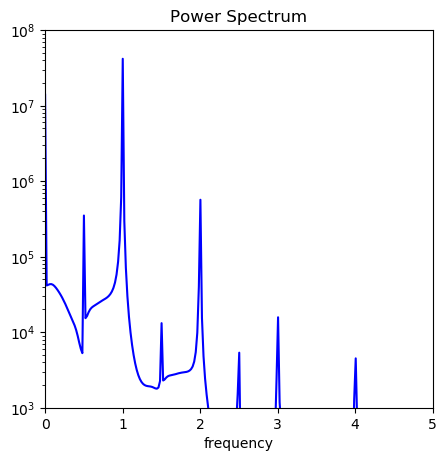

In [9]:
start, stop = start_stop_indices(t_pts, 0., t_end)    
signal = phi[10:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 5.)
ax_ps.set_ylim(1.e3, 1.e8)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum')

## Make plots for Taylor problem 12.10

In [10]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')
delta_phi_vs_time_labels = (r'$t$', r'$|\Delta\phi(t)|$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.073
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


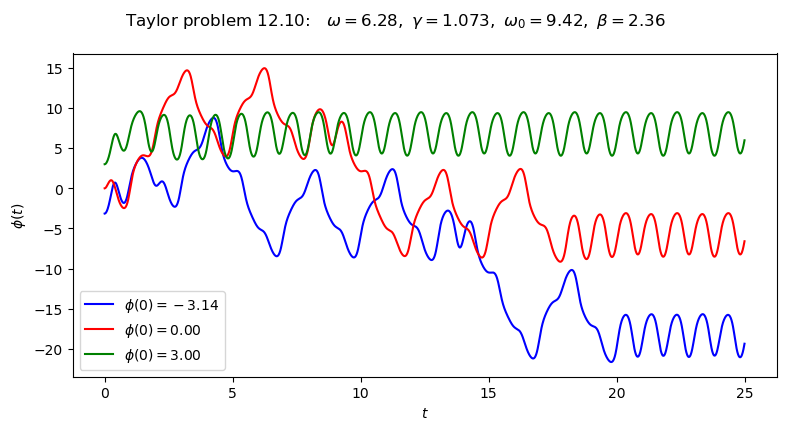

In [11]:
# one plot with multiple initial conditions
phi_0_a = -np.pi
phi_dot_0 = 0.0
phi_a, phi_dot_a = p1.solve_ode(t_pts, phi_0_a, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_b = 0.
phi_dot_0 = 0.0
phi_b, phi_dot_b = p1.solve_ode(t_pts, phi_0_b, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_c = 3.
phi_dot_0 = 0.0
phi_c, phi_dot_c = p1.solve_ode(t_pts, phi_0_c, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)


# start the plot!
fig = plt.figure(figsize=(8,4))
overall_title = 'Taylor problem 12.10:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# one plot: plot from t=0 to t=25  
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 25)    
plot_y_vs_x(t_pts[start : stop], phi_a[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=rf'$\phi(0) = {phi_0_a:.2f}$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi_b[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=rf'$\phi(0) = {phi_0_b:.2f}$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi_c[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='green',
            label=rf'$\phi(0) = {phi_0_c:.2f}$', 
            ax=ax_a)    
                              

fig.tight_layout()
fig.savefig('problem_12.10.png', bbox_inches='tight')  # always bbox_inches='tight'

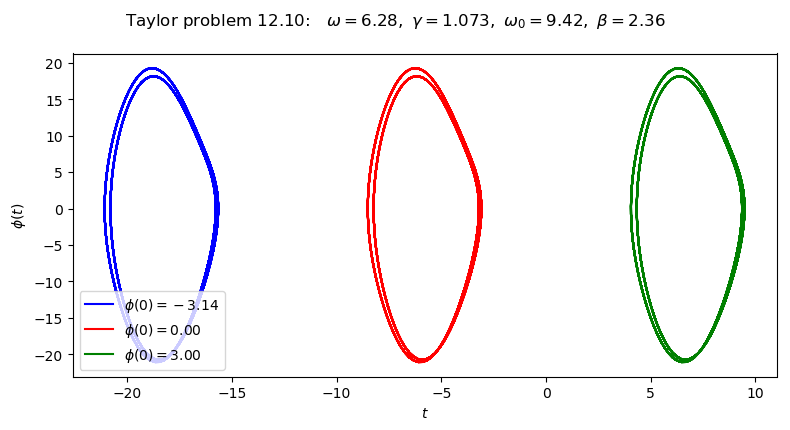

In [12]:

# start the plot!
fig = plt.figure(figsize=(8,4))
overall_title = 'Taylor problem 12.10:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# one plot: plot from t=0 to t=25  
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 30., 50.)    
plot_y_vs_x(phi_a[start : stop], phi_dot_a[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=rf'$\phi(0) = {phi_0_a:.2f}$', 
            ax=ax_a)    
plot_y_vs_x(phi_b[start : stop], phi_dot_b[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=rf'$\phi(0) = {phi_0_b:.2f}$', 
            ax=ax_a)    
plot_y_vs_x(phi_c[start : stop], phi_dot_c[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='green',
            label=rf'$\phi(0) = {phi_0_c:.2f}$', 
            ax=ax_a)    
                              

fig.tight_layout()
fig.savefig('problem_12.10_alt.png', bbox_inches='tight')  

## Make plots for Taylor problem 12.14

This time we plot $\Delta \phi$.

In [13]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.084
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


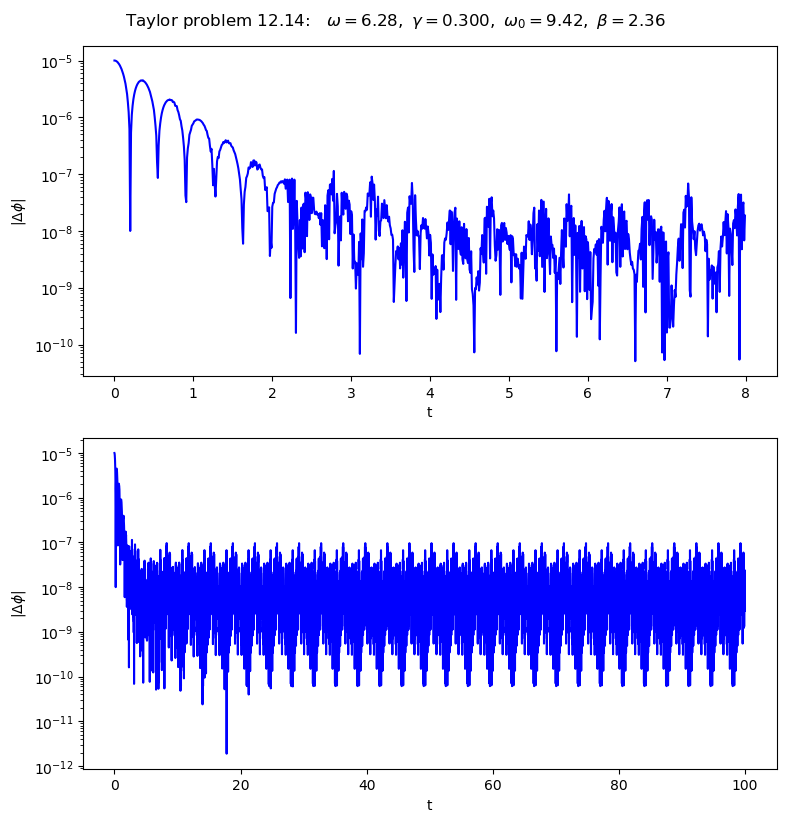

In [20]:
# one plot with multiple initial conditions
phi_0_1 = 0.0
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(t_pts, phi_0_1, phi_dot_0)

phi_0_2 = 0.00001
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(t_pts, phi_0_2, phi_dot_0)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)


# start the plot!
fig = plt.figure(figsize=(8,8))
overall_title = 'Taylor problem 12.14:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 8.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None) 
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('problem_12.14.png', bbox_inches='tight')  

## Make plots for Taylor problem 12.15

This time we plot $\Delta \phi$.

In [15]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 0.3
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


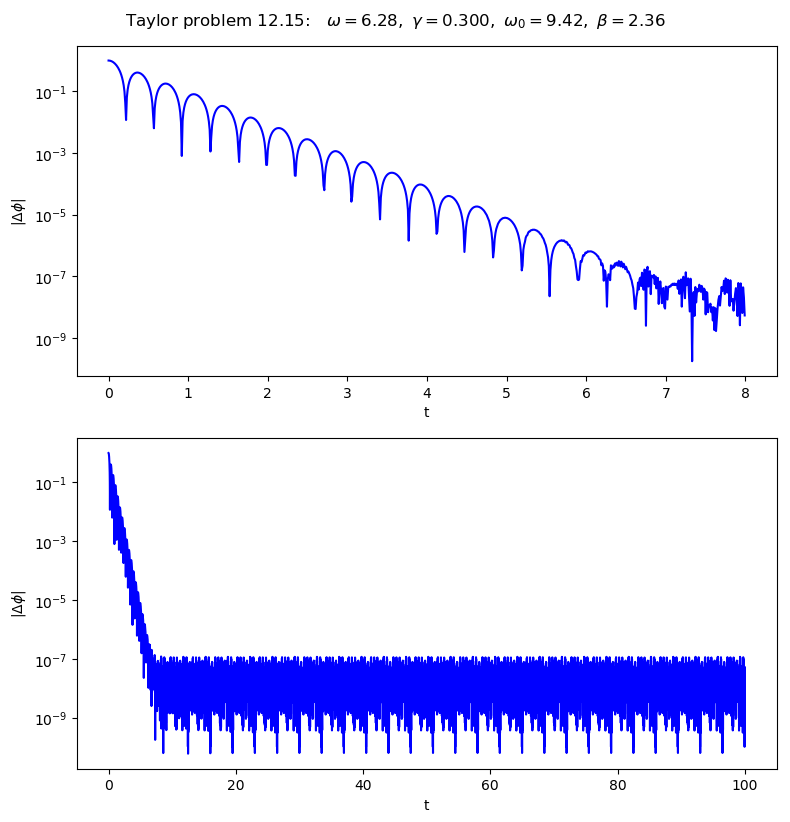

In [19]:
# one plot with multiple initial conditions
phi_0_1 = 0.0
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(t_pts, phi_0_1, phi_dot_0)

phi_0_2 = 1.0
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(t_pts, phi_0_2, phi_dot_0)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)


# start the plot!
fig = plt.figure(figsize=(8,8))
overall_title = 'Taylor problem 12.15:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 8.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('problem_12.15.png', bbox_inches='tight')  

Now repeat with smaller abserr and relerr for the ode solver:

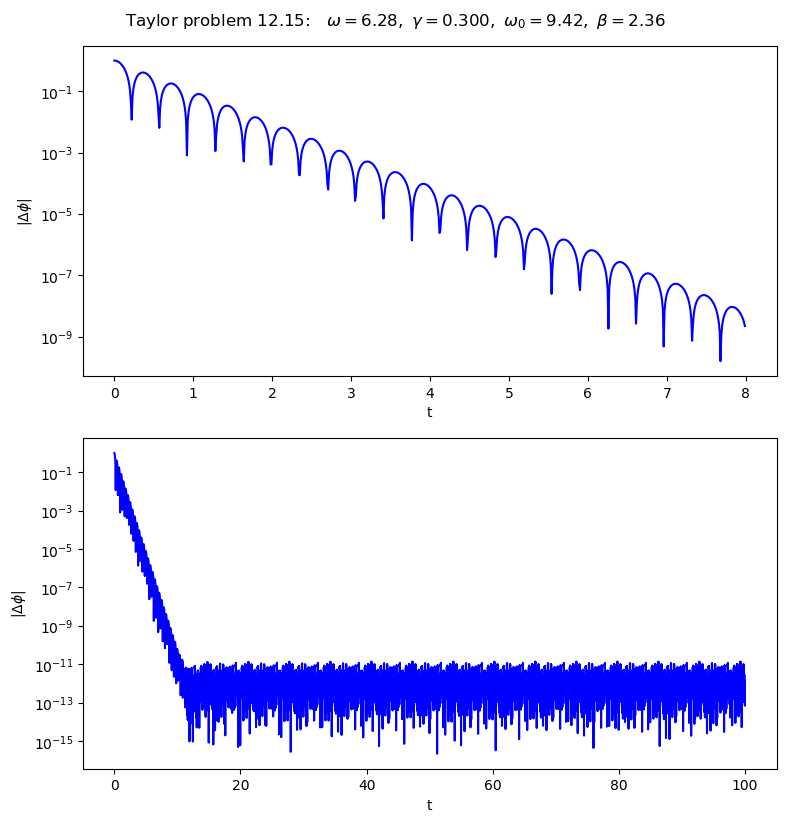

In [18]:
# one plot with multiple initial conditions
phi_0_1 = 0.0
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(t_pts, phi_0_1, phi_dot_0, 
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = 1.0
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(t_pts, phi_0_2, phi_dot_0, 
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)


# start the plot!
fig = plt.figure(figsize=(8,8))
overall_title = 'Taylor problem 12.15:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 8.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('problem_12.15.png', bbox_inches='tight')  